In [1]:
import os,sys
import csv
import copy
import math

from IPython.display import Math
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from clawpack import pyclaw

from scipy.integrate import simps, trapz

sys.path.append("/home/pgrover/Dropbox/PhD/Morphodynamic_Model/pymorph")
from weno import WENO,ENO
from weno import get_stencil
from avalanche_scheme import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
nx=100
x = pyclaw.Dimension(0.0,25.0,nx,name='x')
domain = pyclaw.Domain(x)
state = pyclaw.State(domain,1)
xc = state.grid.x.centers
dx = state.grid.delta[0]



In [4]:
z = np.zeros(nx)
for i in range(nx):
    if i < 50:
        z[i] = 4
    else:
        z[i]= 1

z_new = z.copy()
z_inital = z.copy()

bed_changed = True
max_iter = 100
iteration = 1

while bed_changed == True and iteration < max_iter:
    bed_changed = False
    iteration +=1
    for i in range(len(xc)):
        zloc = get_stencil(z,i,i+2)
        slope =get_slope(dx, zloc)
        
        factor = 0.1
        check_adjustment = True
        if slope < -30.0:
            #print('Checking slope for i={0} slope={1}'.format(i,slope))
            xloc = get_stencil(xc,i-1,i+2)
            zloc = get_stencil(z,i-1,i+2)        
            area_old = get_area_polygon(dx, xloc, zloc)

            dz = adjustment_to_target(dx,zloc)
            
            if iteration < 75:
                z_new[i]-=dz * factor
            else:
                z_new[i]-=dz * 0.75

            zloc_new = get_stencil(z_new,i-1,i+2)          
            area_new = get_area_polygon(dx, xloc, zloc_new)
            del_area = area_old - area_new

            #print('Old area: {0}, New area: {1}'.format(area_old,area_new))
            #print('Difference in area: {0}'.format(del_area))

            # move downstream
            xloc_p1 = get_stencil(xc,i,i+3)
            zloc_p1 = get_stencil(z,i,i+3)
            
            print('i={0}, del_area:{1}'.format(i,del_area))
            if del_area > 0:
                new_z = adjust_bed(dx,xloc_p1,zloc_p1,del_area)
                z_new[i+1] = new_z
            bed_changed = True

        z = z_new.copy()

area_old = trapz(z_inital, dx=dx)
area_new = trapz(z, dx=dx)     
print('Completed after {0} iterations'.format(iteration))
print(area_old,area_new)

TypeError: get_area_polygon() takes exactly 2 arguments (3 given)

(0, 5)

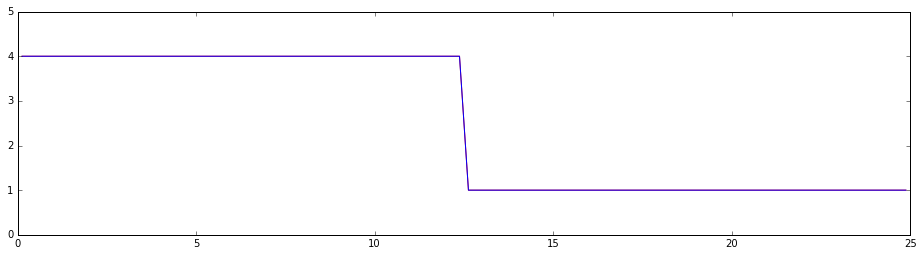

In [4]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(111)

plt.plot(xc, z_inital,'r')
plt.plot(xc, z_new,'b')
plt.ylim([0,5])

In [5]:
for i in range(len(xc)):
    zloc = get_stencil(z_new,i,i+2)
    slope =get_slope(dx, zloc)
    print slope

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-85.2363583093
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
85.2363583093


In [6]:
z = np.zeros(nx)
for i in range(nx):
    if i < 100 and i > 50:
        z[i] = 4
    else:
        z[i]= 1

z_updated,iterations = avalanche_model(dx,xc,z)

area_old = trapz(z, dx=dx)
area_new = trapz(z_updated, dx=dx)  

print('Area old: {0} Area new: {1} Iterations: {2}'.format(area_old,area_new,iterations))

Area old: 61.125 Area new: 61.1231920227 Iterations: 91


(0, 5)

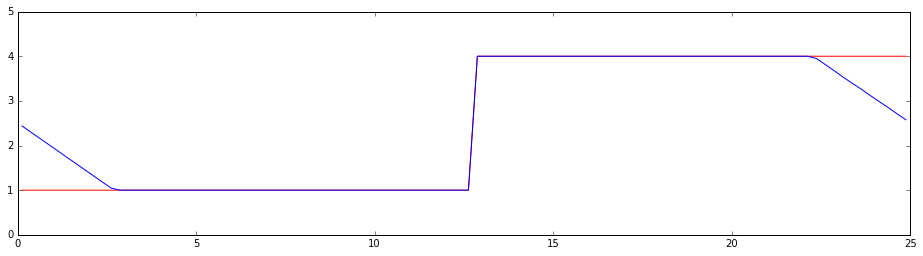

In [7]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(111)

plt.plot(xc, z,'r')
plt.plot(xc, z_updated,'b')
plt.ylim([0,5])

In [8]:
len(z)

100